In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os

In [2]:
laptops = pd.read_csv('laptops.csv')
laptops.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,old_price_euros,new_price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1280,1440
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,839,999
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,515,675
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2477,2637
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1744,1904


In [3]:
laptops.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
laptops.dropna(inplace=True)
laptops.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,old_price_euros,new_price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1280,1440
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,839,999


In [4]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  old_price_euros   1303 non-null   int64  
 12  new_price_euros   1303 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 142.5+ KB


In [5]:
laptops.drop_duplicates(keep=False, inplace=True)
laptops['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [6]:
laptops.groupby('Company').mean().reset_index()

,Company,Inches,old_price_euros,new_price_euros
0,Acer,15.047000,581.510000,736.920000
1,Apple,13.247619,1506.857143,1664.238095
2,Asus,15.487248,1078.718121,1234.255034
3,Chuwi,14.500000,255.666667,414.333333
4,Dell,15.121528,1150.909722,1306.013889
5,Fujitsu,15.600000,672.000000,829.000000
6,Google,12.300000,1618.000000,1777.666667
7,HP,14.966038,1033.128302,1186.800000
8,Huawei,13.000000,1369.000000,1524.000000
9,LG,15.066667,2051.333333,2199.000000


In [7]:
#Top 5 based on final lowest price
laptops[['Company', 'Product', 'Ram', 'old_price_euros', 'new_price_euros']].sort_values(by='new_price_euros').head()

,Company,Product,Ram,old_price_euros,new_price_euros
1215,Acer,C740-C9QX (3205U/2GB/32GB/Chrome,2GB,126,274
20,Asus,Vivobook E200HA,2GB,132,292
1120,Vero,V131 (X5-Z8350/4GB/32GB/FHD/W10),4GB,148,296
31,Asus,E402WA-GA010T (E2-6110/2GB/32GB/W10),2GB,139,299
290,Acer,Chromebook C910-C2ST,2GB,144,299


In [8]:
#Top 5 based on highest final price
laptops[['Company', 'Product', 'Ram', 'new_price_euros']].sort_values(by='new_price_euros', ascending=False).head()

,Company,Product,Ram,new_price_euros
196,Razer,Blade Pro,32GB,6199
830,Razer,Blade Pro,32GB,5599
610,Lenovo,Thinkpad P51,32GB,4999
749,HP,Zbook 17,16GB,4489
1066,Asus,ROG G701VO,64GB,4075


In [9]:
laptops.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'old_price_euros',
       'new_price_euros'],
      dtype='object')

In [10]:
#describe every brand in the dataset and sort the brand by the highest old price.

def LaptopCompany(x):
    y = laptops[['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu',
       'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'old_price_euros', 'new_price_euros']][laptops['Company'] == x]
    y = y.sort_values(by='Company', ascending=False)
    return y

In [11]:
dataApple = LaptopCompany('Apple')
dataApple.sort_values(by = 'new_price_euros', ascending=False)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,old_price_euros,new_price_euros
17,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16GB,512GB SSD,AMD Radeon Pro 560,macOS,1.83kg,2798,2958
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2477,2637
12,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16GB,256GB SSD,AMD Radeon Pro 555,macOS,1.83kg,2380,2540
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2080,2240
249,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,512GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1985,2140
270,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.9GHz,8GB,512GB SSD,Intel Iris Graphics 550,macOS,1.37kg,1904,2059
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1744,1904
15,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1459,1619
81,Apple,"MacBook 12""",Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core i5 1.3GHz,8GB,512GB SSD,Intel HD Graphics 615,macOS,0.92kg,1450,1610
45,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.0GHz,8GB,256GB SSD,Intel Iris Graphics 540,macOS,1.37kg,1359,1519


C:\Users\AJAY KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AJAY KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


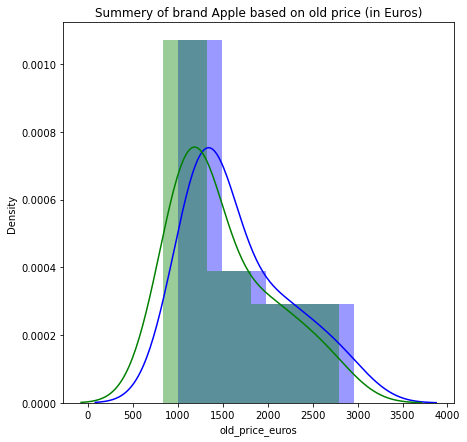

In [12]:
plt.figure(figsize=(7,7))
sns.distplot(dataApple['new_price_euros'], color='blue', label='new_price_euros')
sns.distplot(dataApple['old_price_euros'], color='green', label='old_price_euros')
plt.title('Summery of brand Apple based on old price (in Euros)')
plt.show()

In [13]:
dataLenovo = LaptopCompany('Lenovo')
dataLenovo.sort_values(by = 'new_price_euros', ascending=False)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,old_price_euros,new_price_euros
610,Lenovo,Thinkpad P51,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6 3.1GHz,32GB,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.5kg,4838,4999
744,Lenovo,Thinkpad P51s,Workstation,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7600U 2.8GHz,16GB,1TB SSD,Nvidia Quadro M520M,Windows 10,2.5kg,3236,3399
1081,Lenovo,IdeaPad Y900-17ISK,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32GB,512GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,4.6kg,3192,3340
563,Lenovo,Thinkpad P71,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M620M,Windows 10,3.4kg,2941,3099
1017,Lenovo,ThinkPad P70,Notebook,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6820HQ 2.7GHz,16GB,512GB SSD,Nvidia Quadro 3000M,Windows 7,2.4kg,2920,3068
...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,Lenovo,V110-15IAP (N3350/4GB/128GB/No,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,128GB SSD,Intel HD Graphics 500,No OS,1.9kg,223,371
504,Lenovo,Chromebook N23,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,16GB SSD,Intel HD Graphics 400,Chrome OS,1.25kg,207,365
136,Lenovo,V110-15IAP (N3350/4GB/1TB/No,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,1TB HDD,Intel HD Graphics 500,No OS,1.9kg,192,352
35,Lenovo,IdeaPad 120S-14IAP,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,64GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44kg,189,349


C:\Users\AJAY KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AJAY KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


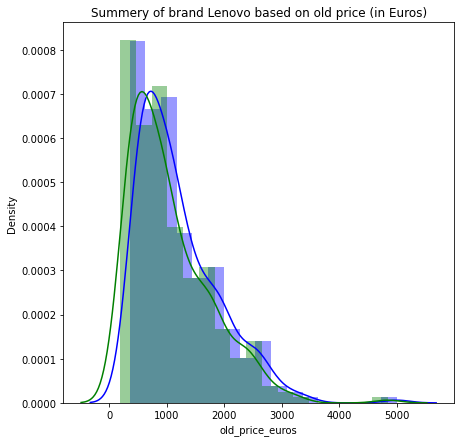

In [14]:
plt.figure(figsize=(7,7))
sns.distplot(dataLenovo['new_price_euros'], color='blue', label='new_price_euros')
sns.distplot(dataLenovo['old_price_euros'], color='green', label='old_price_euros')
plt.title('Summery of brand Lenovo based on old price (in Euros)')
plt.show()

C:\Users\AJAY KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AJAY KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


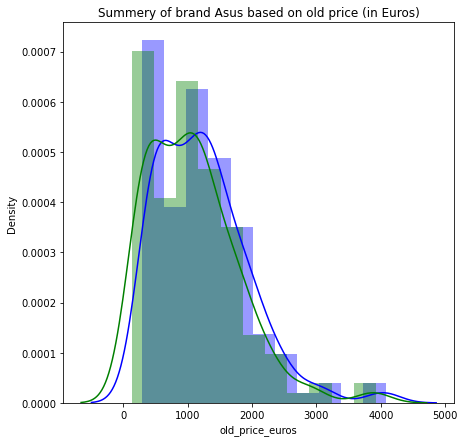

In [15]:
dataAsus = LaptopCompany('Asus')
dataAsus.sort_values(by = 'new_price_euros', ascending=False)

plt.figure(figsize=(7,7))
sns.distplot(dataAsus['new_price_euros'], color='blue', label='new_price_euros')
sns.distplot(dataAsus['old_price_euros'], color='green', label='old_price_euros')
plt.title('Summery of brand Asus based on old price (in Euros)')
plt.show()

C:\Users\AJAY KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


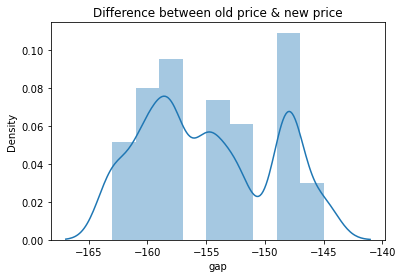

In [16]:
laptops['gap'] = laptops['old_price_euros'] - laptops['new_price_euros']

sns.distplot(laptops['gap'])
plt.title('Difference between old price & new price')
plt.show()

In [17]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [18]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [19]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [20]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('laptops.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'laptops.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 14 columns


In [21]:
df1.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,old_price_euros,new_price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1280,1440
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,839,999
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,515,675
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2477,2637
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1744,1904


<ipython-input-17-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-17-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-17-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-17-0121bf3d9d74>:10: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(nGraphRow, nGraphPerRow, i + 1)
<ipython-input-17-0121bf3d9d

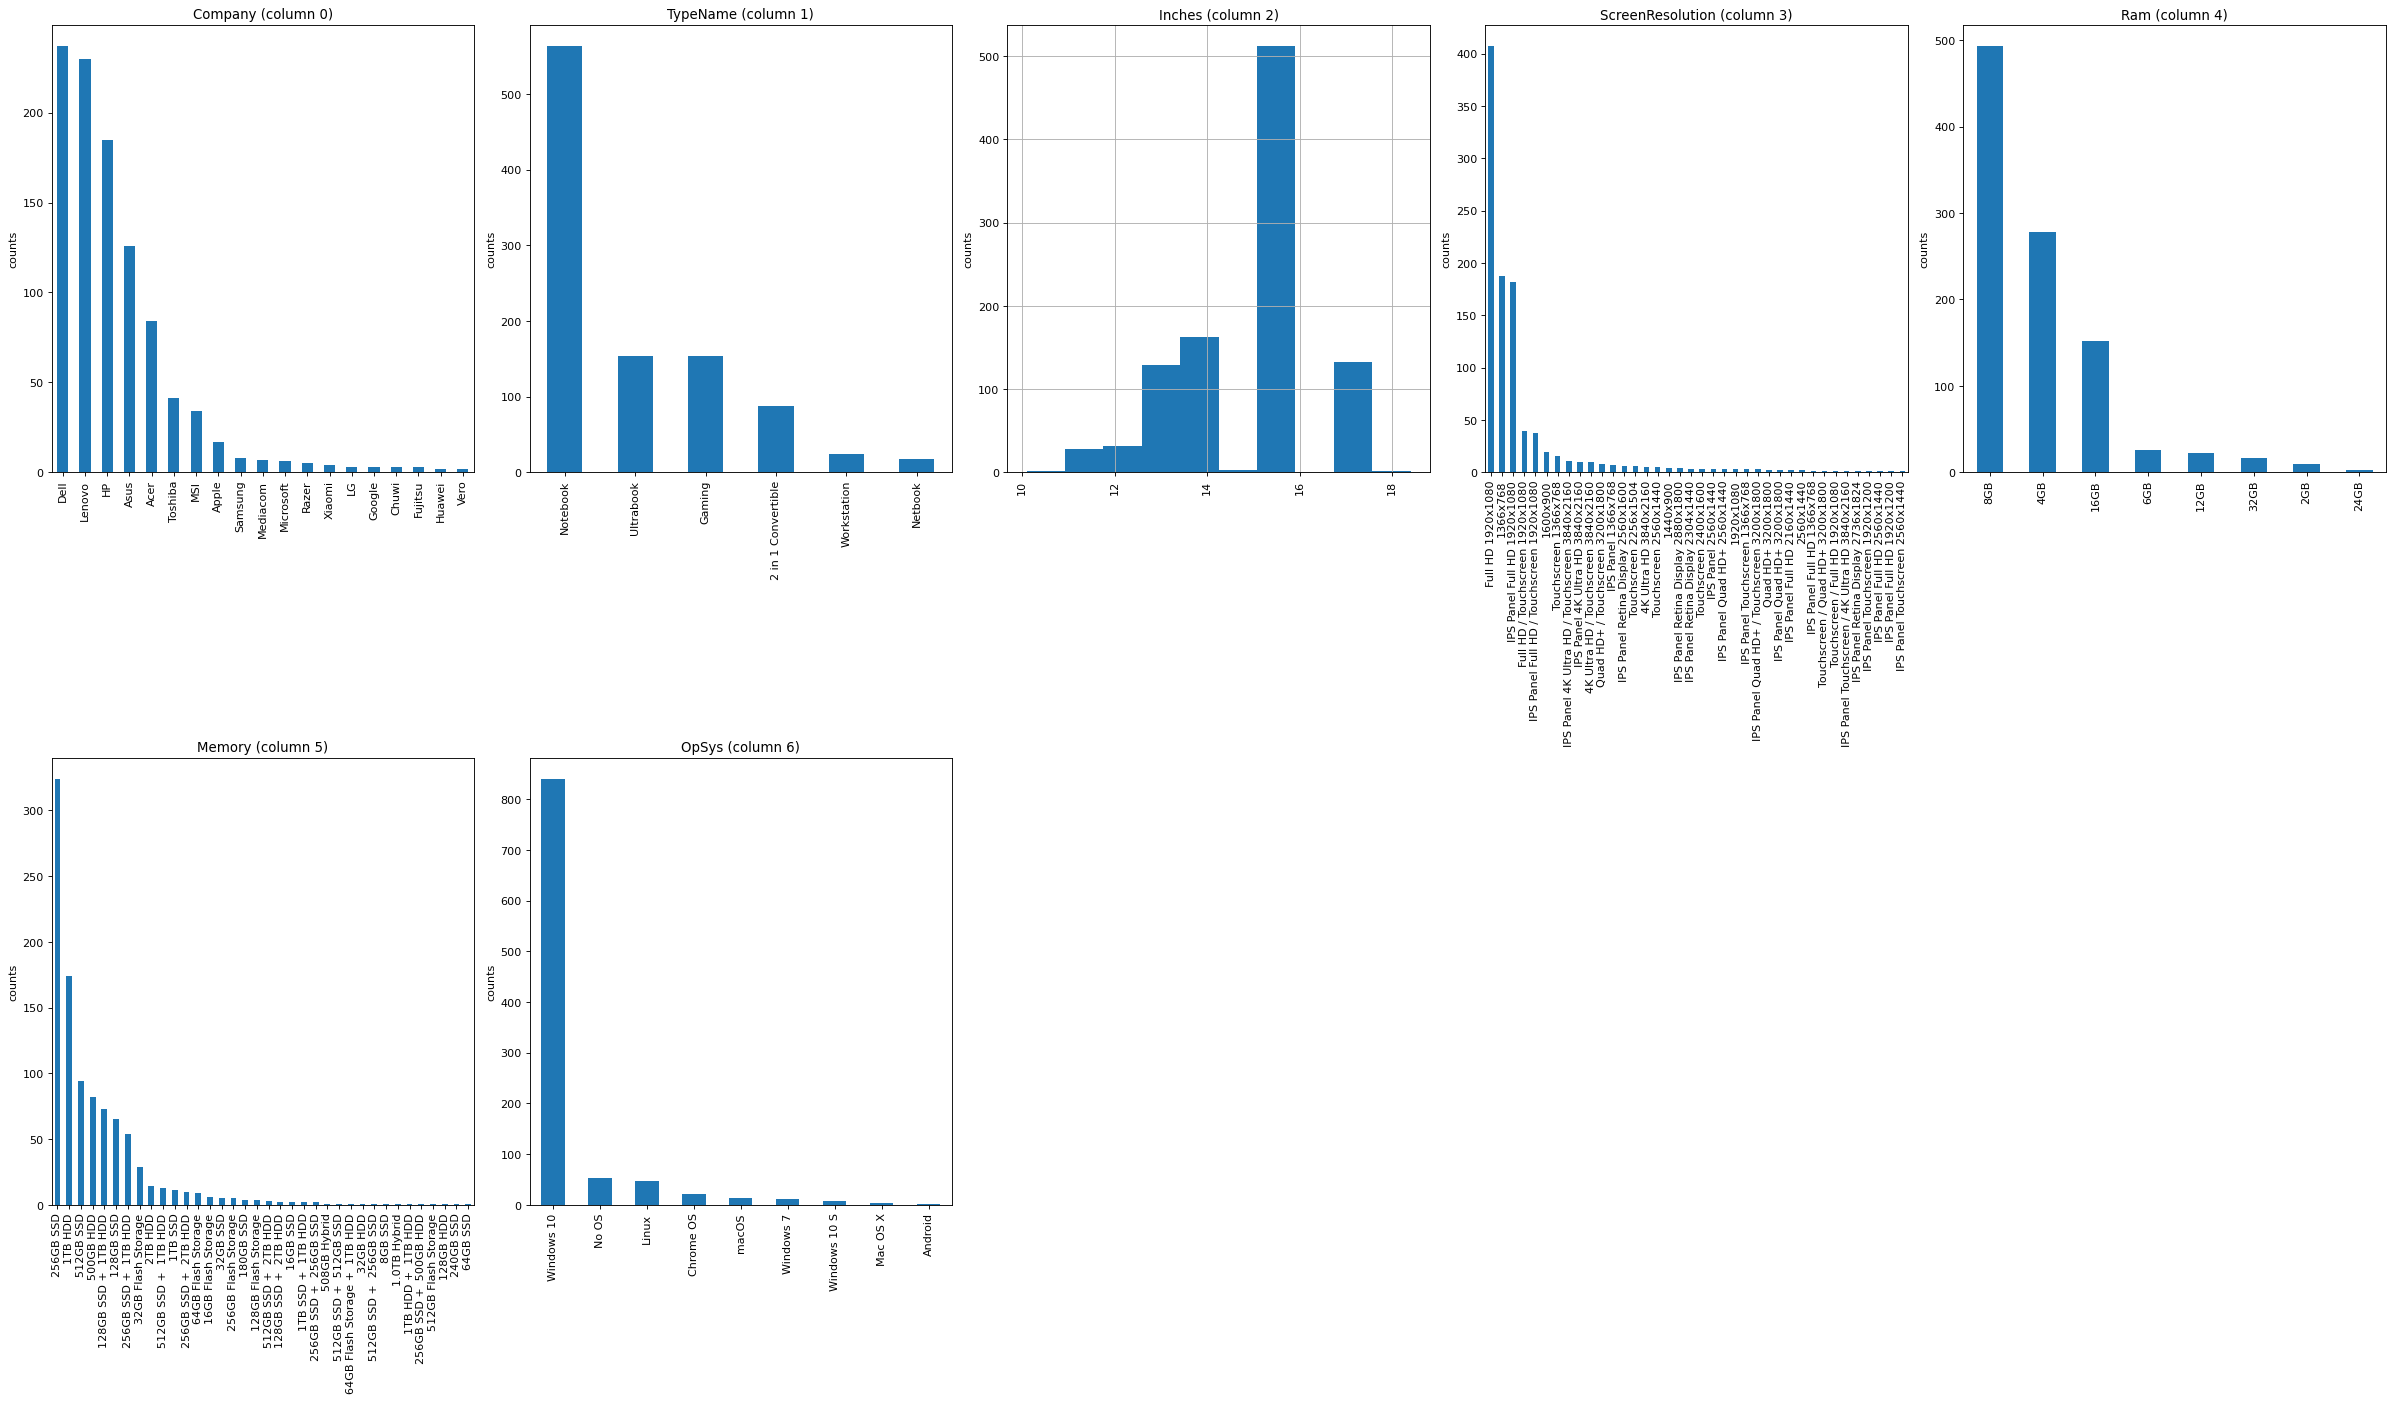

In [22]:
#Distribution graphs (histogram/bar graph) of sampled columns:
plotPerColumnDistribution(df1, 10, 5)

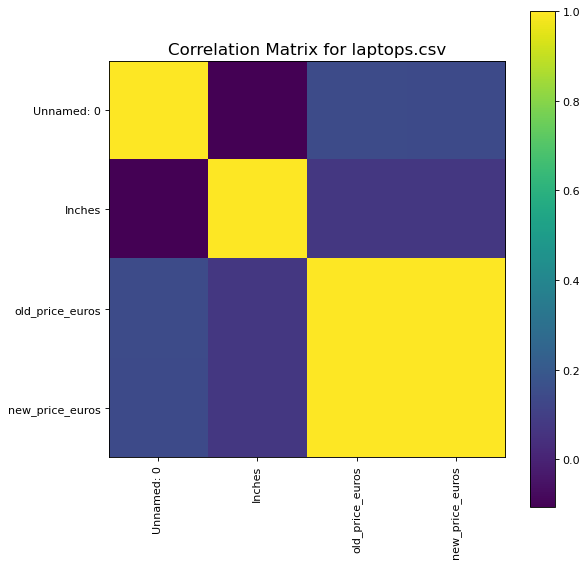

In [23]:
#Correlation matrix:
plotCorrelationMatrix(df1, 8)

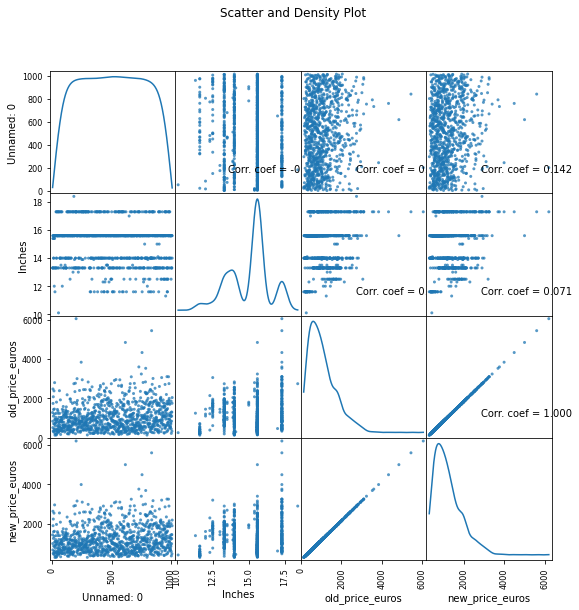

In [24]:
#Scatter and density plots:
plotScatterMatrix(df1, 9, 10)